# What is this

On February 11, 2020, I (Steven Weisberg), was alerted to a bug on the Virtual Silcton platform. Over the next year, along with my collaborators Nora Newcombe and Victor Schinazi, we discovered the source of the bug and collected a new large dataset to determine as best we can, the effects of the bug on previously collected data. 

This notebook is an in-depth explanation of the bug and its impacts on Virtual Silcton data. First, a TL;DR and an FAQ. 

## Too long; didn't read

Since the very first Virtual Silcton project (Weisberg, Schinazi, Shipley, Epstein, & Newcombe, 2014), a bug has affected the onsite pointing task. 

The nature of the bug is such that the original error-free data are unrecoverable. However, the bug is also not random. It differentially affects particular trials, and particular participants more than others. These properties made the bug incredibly difficult to detect but also, hopefully, minimally damaging. 

New data we have collected show that the effects of the bug do appear minimal. At the trial level, many individual trials are unaffected or minimally affected. More critically, at the participant level, the effect of the bug overall is to lower the overall rate of error and to reduce the overall variance. But poor navigators remain poor navigators and good navigators remain good navigators. In fact, the rank ordering of participants is almost identical between buggy and non-buggy coding. 

## Answering a few other questions

### 1. Why so much detail? 

Under ordinary circumstances, a bug in an experimental paradigm would not necessitate so many words. But this is a bug affecting a widely-used and highly-cited experimental paradigm. It has been used to collect thousands of subjects by many labs. 

The Virtual Silcton platform has been publicly available since its inception and has been used by many other labs. Every user of the Silcton paradigm deserves to know exactly what happened and why. Plus, the experiments that have been published using this platform have also been cited, some quite highly. People who have cited these papers deserve to know the effects. 

### 2. I collected Virtual Silcton data - what do I do? 

At this time, we recommend adjusting your original data at the participant-level by applying a model. (WEB APP and details FORTHCOMING). You can then recreate your participant-level data and re-run your analyses to determine what (if anything) is different. At that time, you can decide whether to run a correction or (in drastic cases) a retraction. We are more than happy to contribute what we can toward this effort. 

What we cannot do at this time is re-create the trial-level data. If you have analyses that rely on trial-level analyses, the only solution we can offer at this time is to collect new data using Virtual Silcton 2.0. We are happy to contribute to efforts to recreating Virtual Silcton data at the trial level.

### 3. What about the Silcton studies I've cited? 

We are in the process of publishing a full report of our newly collected data, which was a replication of Weisberg et al. (2014). If you want to know what is different between the original (buggy) analyses and the new (non-buggy) analyses, we believe effects are minimal and, if anything, weaker in the buggy analyses. 

Moreover, the model building task analyses are all unchanged (except where it was compared to the pointing task). The converging evidence from this task increases our confidence in these original results. 

## A personal note

2020 was an inordinately difficult year. Discovering a bug in an experimental paradigm I have stood behind, presented, published on, and shared was the worst thing that has ever happened to me, professionally. 

I am extraordinarily grateful for the (mental, professional, and emotional) support from Victor Schinazi and Nora Newcombe, who have been involved in this process since Day 1. I am also grateful to everyone else who has been supportive or helped, from research assistants in my lab who helped collect and code the new and old data, to expert data sleuth Derek Huffman, who discovered the initial bug. 

After (hopefully) discovering that these bugs have minimal effects on published data, I feel more optimistic (not less) about future work and bug discovery and the process of science. 

Thank you all for reading. 

**-Steve**

# Background

## Virtual Silcton

The Virtual Silcton platform is a series of virtual environment encoding and retrieval measures designed to explore individual differences in spatial navigation. Current documentation is available [here](http://stevenmweisberg.com/Virtual_Silcton_Documentation/). 

Based off a real environment used in an earlier real world study by [Schinazi et al in 2003](https://onlinelibrary.wiley.com/doi/epdf/10.1002/hipo.22111), Virtual Silcton involves participants exploring two main routes and two connecting routes that contain eight target buildings, which participants must learn the names and locations of. Participants walk along demarcated paths in the virtual environment, and then are tested using several different measures to see how accurately they can learn the distances and directions from and to all target buildings. The two main tasks to measure accuracy are a pointing task and a map building task. 

The Virtual Silcton platform has been used in at least a dozen experiments over the years.

<img src= "../images/routeone.png">
<img src= "../images/routetwo.png">
<img src="../images/vsmap.png">

## Pointing Task
To understand the effects of the bug, it is critical to understand how the pointing task works. 

Participants are located next to one of the eight buildings that they have learned (directly beneath the gem). They are prompted to point to one of the other buildings. They point to all of the other buildings from this first building and are then automatically dropped at the next building and asked to point to all the buildings from there, and so on. 

<img src="../images/point.png">

The dependent variable of the pointing task is the error, computed as the angular distance between the CORRECT ANGLE and the PARTICIPANT'S RESPONSE. 

Canonical results from the Virtual Silcton experiments tabulate error on the pointing task separately for **within** and **between** route trials. 

* Within: pointing to buldings on the same route as the building the participant is standing next to.
* Between: pointing to building on the other route.

<img src="../images/between_within.png">

## Bug discovery

In February 2020, I was alerted to an irregularity in the Virtual Silcton onsite pointing task by Derek Huffman, who was planning to use Virtual Silcton for his own research project. 

Derek noted that the 'bearing,' which was being stored on the Virtual Silcton website only varied from 0-180, rather than 0-360 as would be expected.

<img src="../images/Silcton_Website_Bearing.png">

From my knowledge of the code, I assumed that something in the Unity backend (or website backend) would account for this possibility. 

As I explored more, I realized that the way the "actual directions" were stored (see the column "actual directions" in the image above), also varied from 0-180. This means that a building that is "to the right" and a building "to the left" would be equivalently stored as "actual directions" = 90. Similarly a pointing judgment to the "left" and a pointing judgment to the "right" would be stored as 90. 

A "smoking gun" test revealed that pointing to the right for a building that is to one's left resulted in 0 degrees of error; rather than the expected 180. 

I discovered this error on the night of 2/11/2020 and immediately contacted two of the original authors of the Virtual Silcton paper (Weisberg, Schinazi, Newcombe, Shipley, & Epstein, 2014), Nora Newcombe and Victor Schinazi, to alert them to what I now realized was an insidious bug in the way the data were being calculated for the onsite pointing task. 

Further investigation revealed that the cause of the bug was due to the fact that Unity could originally only output "unsigned" angles (varying from 0-180 away from some target direction). This angle was calculated as follows in Unity. 

<img src="../images/Original_Unity_Pointing_Angle_Calculation.png">



## An example using Silcton buildings

For example, standing at Batty Hall, pointing to Harris Hall, the participant would need to point 37.52&deg;. That angle means that standing at Batty, facing down the route toward Lynch Station, Harris Hall's front door will be 37.52&deg; clockwise. 

However, any judgments that were counter-clockwise from that facing direction would have had a bug. In other words, a perfectly correct judgment (37.52&deg;) would have been recorded exactly the same as a pointing judgment that was 37.52&deg; COUNTER-CLOCKWISE. 

<img src="../images/pointingDemos/Slide1.JPG">
<img src="../images/pointingDemos/Slide2.JPG">
<img src="../images/pointingDemos/Slide3.JPG">

# Bug explanation

What was going wrong? 

Imagine a compass where each bearing is assigned a number from between 0-360. North might arbitrarily be assigned to be 0. We can equivalently represent the compass as from -180 to 180, where 0 is still North, +90 = East (a clockwise rotation), +/- 180 = South, and -90 equals West (a counter-clockwise rotation). 

We can then describe a pointing angle with reference to North as degrees away from 0, with positive indicating a clockwise direction and negative indicating a counter-clockwise direction. 

Now let's say that someone is pointing to a building that is located to the Northeast (+45 degrees). Pointing error is calculated as the absolute value of the difference between the estimated angle minus the actual angle (|estimate - actual| = error).[<sup>1</sup>](#fn1 "This is technically unsigned pointing error that does not account for whether the person points to the left or right of the target and is what we have typically analyzed in Silcton projects.")

<sup>1</sup><span id="fn1">This is technically unsigned pointing error that does not account for whether the person points to the left or right of the target and is what we have typically analyzed in Silcton projects.</span>

In [1]:
# Import a few packages and initialize a handy symbol

import pandas as pd
from math import radians
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from scipy import stats
import pingouin as pg

# Save the degree sign
deg= '\u00b0'

In [2]:
# Let's write a function that will calculate the pointing error for an arbitrary judgment.

def correctPointing(participantAngle,correctAnswer):
    '''Return the non-buggy error for a given participant response and correct answer'''
    global deg
    
    # The error calculation
    error = abs(participantAngle-correctAnswer)
    
    if error > 180:
        error = 360 - error
        
    
    return error

## Bug in Recording Pointing Judgments: Absolute value of participant response angles
In the original Virtual Silcton code, the Unity script above only recorded **positive** numbers. This means a pointing judgment to the East (+90) would be stored equivalently to a pointing judgment to the West (absolute value of -90 or |-90| = 90). As a result, the above calculations would have resulted in equivalent errors: 

In [3]:
# Here is the buggy version of the pointing coding
def buggyPointing(participantAngle,correctAnswer):
    '''Return the buggy error for a given participant response and correct answer'''
    global deg
    
    # The BUGGY error calculation
    # Take the absolute value of each angle first. Then the difference. 
    # (A separate bug had the correctAnswer as an absolute value as well). 
    bugError = abs(abs(participantAngle)-abs(correctAnswer))
    
    
    # If the difference is greater than 180, correct it. 
    if bugError > 180:
        bugError = 360 - bugError
        
    return bugError


In [4]:
#Try to plug in different values for this to see effects 
correctAnswer = 45

participantJudgment1 = 90

participantJudgment2 = -90

print("POINTS EAST, TARGET WAS NORTHEAST")
correctError = correctPointing(participantJudgment1,correctAnswer)
buggyError = buggyPointing(participantJudgment1,correctAnswer)

print(f"Participant's guess: {participantJudgment1}\n" + f"Participant's buggy guess: {abs(participantJudgment1)}\n" +
      f"Correct answer: {correctAnswer}\n" + f"Buggy correct answer: {abs(correctAnswer)}\n" + 
      f"Correct error: |{participantJudgment1} - {correctAnswer}| = {correctError}\n" + 
      f"Buggy error: | |{participantJudgment1}| - |{correctAnswer}| | = {buggyError}\n")

print("POINTS WEST, TARGET WAS NORTHEAST")
correctError = correctPointing(participantJudgment2,correctAnswer)
buggyError = buggyPointing(participantJudgment2,correctAnswer)

print(f"Participant's guess: {participantJudgment2}\n" + f"Participant's buggy guess: {abs(participantJudgment2)}\n" +
      f"Correct answer: {correctAnswer}\n" + f"Buggy correct answer: {abs(correctAnswer)}\n" + 
      f"Correct error: |{participantJudgment2} - {correctAnswer}| = {correctError}\n" + 
      f"Buggy error: | |{participantJudgment2}| - |{correctAnswer}| | = {buggyError}\n")


POINTS EAST, TARGET WAS NORTHEAST
Participant's guess: 90
Participant's buggy guess: 90
Correct answer: 45
Buggy correct answer: 45
Correct error: |90 - 45| = 45
Buggy error: | |90| - |45| | = 45

POINTS WEST, TARGET WAS NORTHEAST
Participant's guess: -90
Participant's buggy guess: 90
Correct answer: 45
Buggy correct answer: 45
Correct error: |-90 - 45| = 135
Buggy error: | |-90| - |45| | = 45



One thing you might realize at this point is that it greatly matters what the correct answer is. 

If the correct answer is 0, there's no difference at ALL between the correct and buggy judgments. (The equation is below). 

To help us visualize what's going here, we'll write a function to see what happens as if we had one participant pointing to all possible angles (from -180 to 180), then plot the comparison of the correct error vs. the buggy error. 

The more **overlap** we see on these plots. The LESS of an effect the bug would have. 

<div class="alert alert-block alert-info">
<b>Tip:</b> If you're viewing this as a Jupyter Notebook, you can edit the script below and run the code yourself to see what happens for different values.</div>

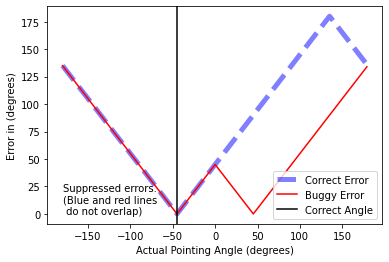

In [6]:
correctAnswer = -45

def plotErrorComparison(correctAnswer):
    '''Simulate all possible errors for buggy and correct coding and compare them graphically.'''
    
    # Grab all angles between -180 to 180, counting by 1
    allAngles = np.arange(-180,180)
    
    # Calculate all errors (correct and buggy)
    correctErrors = np.array([correctPointing(angle,correctAnswer) for angle in allAngles])
    buggyErrors = np.array([buggyPointing(angle,correctAnswer) for angle in allAngles])
    
    # Plot them and annotate
    plt.plot(allAngles,correctErrors,'b--',linewidth=5,alpha = .5,label='Correct Error')
    plt.plot(allAngles,buggyErrors,'r',label='Buggy Error')
    plt.xlabel('Actual Pointing Angle (degrees)')
    plt.ylabel('Error in (degrees)')
    plt.annotate('Suppressed errors.\n(Blue and red lines\n do not overlap)',[-180,0])
    plt.axvline(correctAnswer,color='black',label='Correct Angle')
    plt.legend(loc='lower right')
    plt.show()
    
plotErrorComparison(correctAnswer)  

## Effect of Bug

Bug 1 does not affect all trials equally, but rather systematically impacts trials whose answers are close to 90 degrees on either side. 

Imagine a pointing judgment with a `correctAnswer = 0`. In this case, it wouldn't matter if we take the absolute value of the participant's response. 

`87 - 0 = 87 = |-87| - 0 = 87`

The further we get from 0 degrees (or 180 degrees, where the calculation is the same), the worse this gets until we get to 90, which is the maximally worst possible effect. 

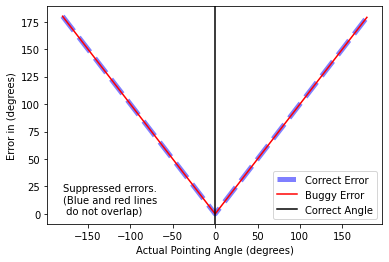

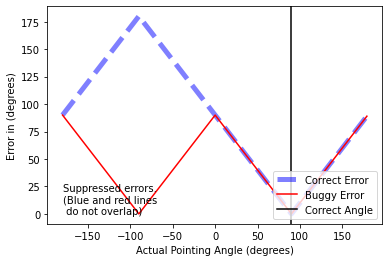

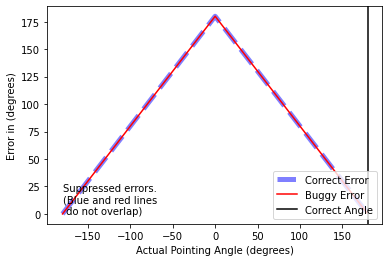

In [7]:
plotErrorComparison(0)  
plotErrorComparison(90)  
plotErrorComparison(180)

## Two nuances

### Absolute value of correct answer angles

The buggy calculation was not solely for pointing judgments, but ALSO for correct answers. That means a building that was Northeast was equivalent to a building that was Northwest. 

This technically was a separate bug, but really only caused more trials to be affected in a less predictable way than had it not existed. 

(It came about because of the same kind of Unity bug on a different calculation). 



### The reference direction changed for each pointing location
These effects are difficult to parse already. Making things more complicated, Virtual Silcton angles were not calculated from the same North for all pointing judgments. 

Recall that participants pointed TO all target buildings FROM all target buildings. The `correctAnswer` was calculated based on the **facing direction** at each building. That is, if you're standing at Building 1, 'North' is calculated as the facing direction between Building 1 -> Building 2, and all other angles are calculated from that. Thus, each pointing trials' effects are slightly different depending on which building one was standing at. 

For example, when standing at Building 1, the pointing direction to Building 4 might be +90. But when standing at Building 2, the pointing direction to Building 4 might be +10. Judgments from Building 1 would thus be MORE BIASED (resulting in BETTER performance just due to chance) than Building 1. 

<div class="alert alert-block alert-warning">
<b>Alert:</b> This is critical for thinking about the trial-level data. What this means is that a participant committed a buggy pointing judgment if they pointed to the opposite side of the circle from the side where the correct judgment was. But what determines the other side of the circle is NOT static; but rather varied depending on where the participant was pointing FROM. 
</div>

The upshot of these two nuances is that the bugged pointing errors were much more nefarious and much more difficult to determine the effects of than they would have been otherwise. 

# Comparing correct and buggy data

Below, you will find a few highlights of the comparison between buggy and correctly-coded data. 

The new data were collected online after the pointing bugs were fixed. Three labs in three locations (University of Florida; Temple University; Bond University) collected approximately 50 subjects each. Due to the COVID-19 pandemic, data were collected by having an experimenter supervise via video call. The experimenter read off all instructions and walked the participant through the paradigm as if the participant were in the lab. 

This difference with the original Silcton experiments remains as a confound, though aside from a few technical issues, we do not anticipate a large difference between experimental protocols or samples. As in the original studies, undergraduate psychology majors were recruited via SONA (or equivalent). 

<div class="alert alert-block alert-warning">
<b>Alert:</b> Recall that the way the data were stored originally, we have **no way of knowing** whether original data collected had a bug or not! 
</div>


The Jupyter code is slightly abridged. The full script can be found [here](./silctonMergeCleanData.py)


In [14]:
# Load in the data (newly collected and original)

# We have participant-level data and pointing trial-level data
participantData = pd.read_csv('../CleanedData/masterDF.csv')
pointingData = pd.read_csv('../CleanedData/masterPointing.csv')
participantData.describe()

# Create a version just with the new data
avgNew = participantData.copy()
avgNew = avgNew[avgNew['New_or_Original']=='New']

# Good_pointing and bad_pointing in this data set refer to correct and buggy coding respectively. 
# Most of the other variables can be ignored for now. 

First, we'll compare the old data to the new data using just the **buggy coding**. 

This will tell us (roughly) how different our samples are. 

## Canonical plot - Original vs. New Data

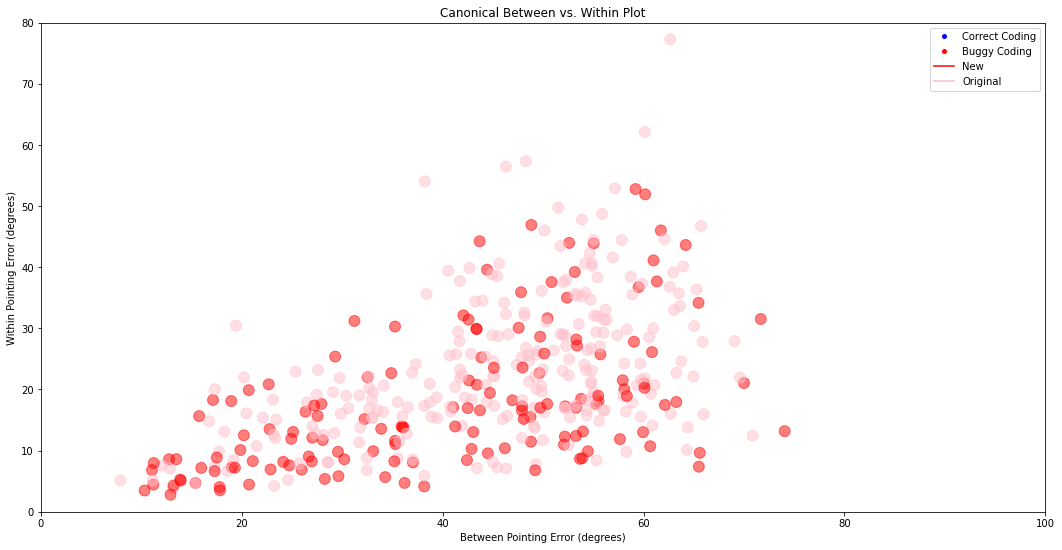

In [16]:
# Set up a list of colors for each type of data
new_old_categories = ['New','Original']
new_old_colors = ['red','pink']
new_old_colordict = dict(zip(new_old_categories, new_old_colors))
participantData["Color"] = participantData['New_or_Original'].apply(lambda x: new_old_colordict[x])


# Set up legend elements for the canonical plots
canonical_legend = [plt.Line2D([0], [0], marker='o',color='w',markerfacecolor='blue',label='Correct Coding'),
                   plt.Line2D([0], [0], marker='o',color='w',markerfacecolor='red',label='Buggy Coding'),
                   plt.Line2D([0], [0], color=new_old_colors[0], label=new_old_categories[0]),
                   plt.Line2D([0], [0], color=new_old_colors[1], label=new_old_categories[1])]



#%% FIGURES: COMPARE OLD AND NEW

# Just canonical bad coding
fig,ax = plt.subplots(figsize=(18,9))

ax = plt.scatter(participantData['bad_pointing_coding_between'],
                 participantData['bad_pointing_coding_within'],
                 c=participantData["Color"],alpha=.5,s=120)

plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")
plt.axis([0, 100, 0, 80])
plt.legend(handles=canonical_legend)
plt.title('Canonical Between vs. Within Plot')
plt.show()

## Canonical Plot - Correct vs. Buggy 


Now let's add the correct coding on there and see how things change. 

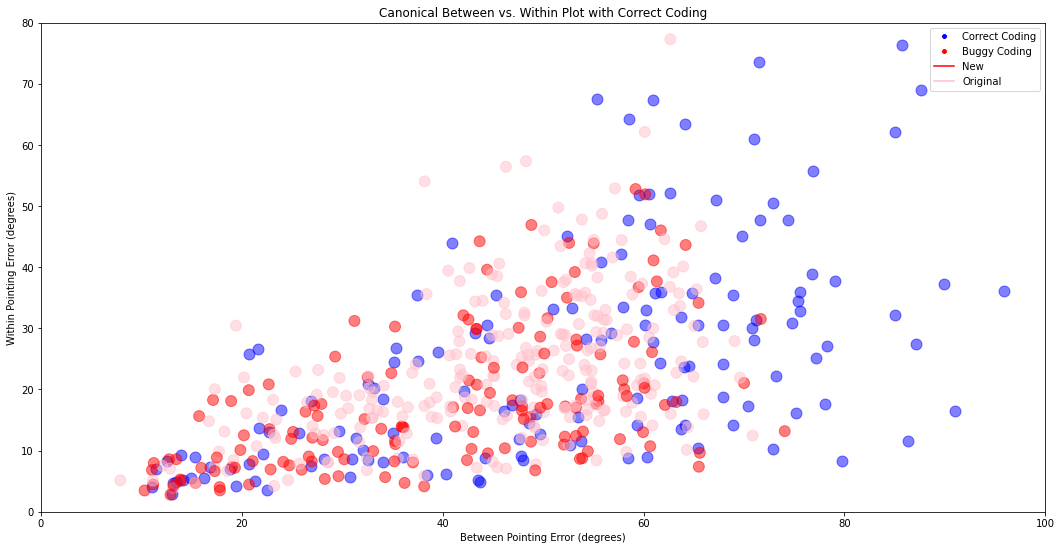

In [19]:
# Bad AND good coding
fig, ax = plt.subplots(figsize=(18,9))

ax = plt.scatter(avgNew['good_pointing_coding_between'],
                 avgNew['good_pointing_coding_within'],
                 c='blue',alpha=.5,s=120)

ax = plt.scatter(participantData['bad_pointing_coding_between'],
                 participantData['bad_pointing_coding_within'],
                 c=participantData["Color"],alpha=.5,s=120)
            
plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")
plt.axis([0, 100, 0, 80])
plt.legend(handles=canonical_legend)
plt.title('Canonical Between vs. Within Plot with Correct Coding')
plt.show()

So, the blue dots are much more stretched out to the right. 

<div class="alert alert-block alert-info">
<b>Note:</b> The pink dots don't have blue counterparts. Remember that we can't recreate the old data).</div> 

## Canonical Plot: Correct vs. Buggy within-subject

These are within-participant calculations. So let's see what happens when we connect each buggy coding red dot to its counterpart blue dot. 

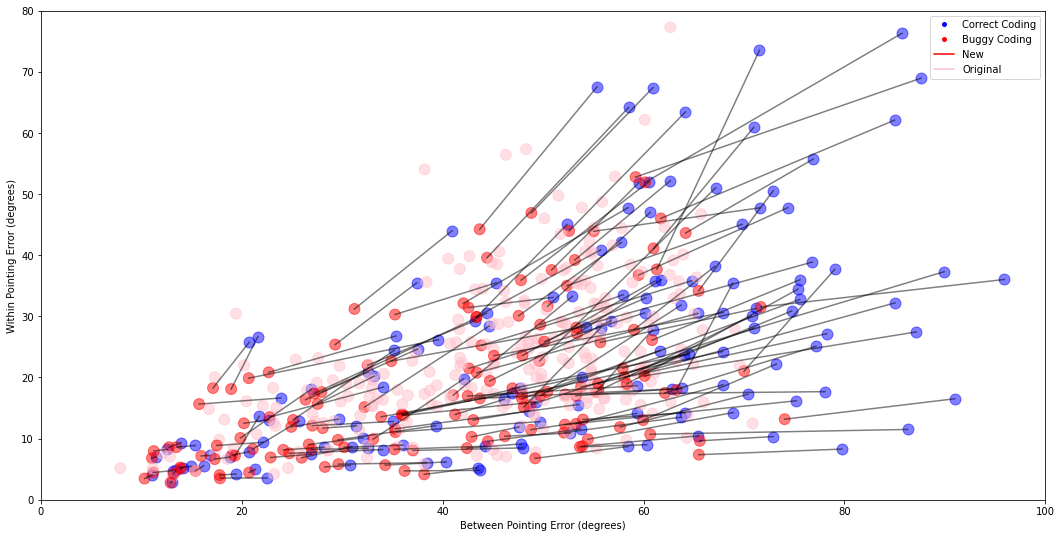

In [20]:
# Comparing good and bad coding with lines
fig, ax = plt.subplots(figsize=(18,9))

ax = plt.scatter(avgNew['good_pointing_coding_between'],
                 avgNew['good_pointing_coding_within'],
                 c='blue',alpha=.5,s=120)

ax = plt.scatter(participantData['bad_pointing_coding_between'],
                 participantData['bad_pointing_coding_within'],
                 c=participantData["Color"],alpha=.5,s=120)
           
# Plot a line connecting each participant's good and bad coding dots. 
for index,row in participantData.iterrows():
      plt.plot([row['good_pointing_coding_between'],
                row['bad_pointing_coding_between']], 
               [row['good_pointing_coding_within'],
                row['bad_pointing_coding_within']], 
               c='black',alpha=.5)

plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")
plt.axis([0, 100, 0, 80])
plt.legend(handles=canonical_legend)
plt.show()

## Arrows Plot: Correct vs. Buggy within-subject

Let's remove all the points and just compare the movement of each participant's data on this scatterplot. 

The beginning of each arrow represents the buggy coding. The end of the arrow is the correct coding. The length of the arrow (and the color of the arrow) is the difference across between and within pointing averages that the bug caused. 


<div class="alert alert-block alert-info">
<b>Note:</b> All the lines move up and to the right - the bug made all pointing errors lower. Also, notice how the arrows seem to get longer the worse that participant did. We'll come back to that.</div> 


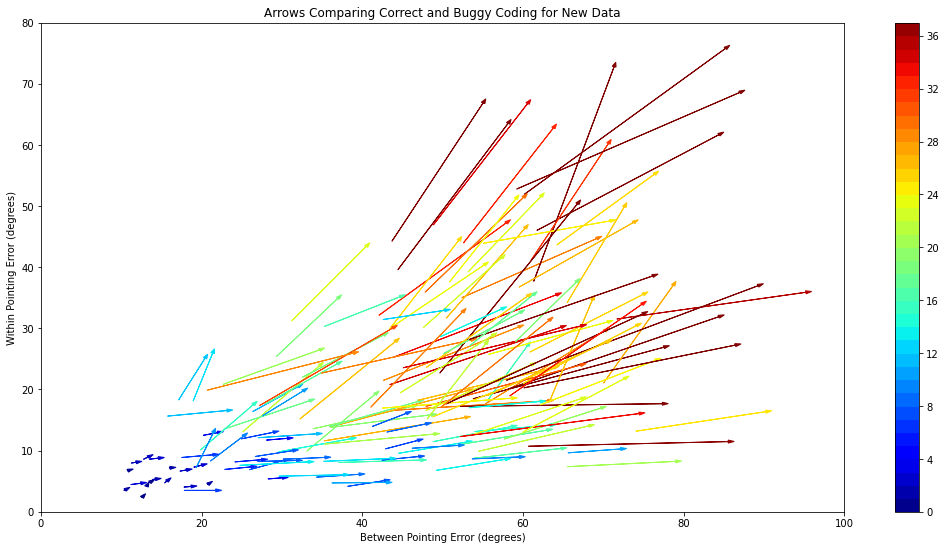

In [21]:

# Arrows Figure 
fig, ax = plt.subplots(figsize=(18,9))

cmap = plt.cm.jet
# Initialize distance and set maxDistance (to allow coloring each line)
avgNew['distance'] = 0
maxDistance = 6616 # Saved after running once

for index,row in avgNew.iterrows():      
     
      # Set good and bad vectors for easier handling
      goodVec = [row['good_pointing_coding_between'],row['good_pointing_coding_within']]
      badVec = [row['bad_pointing_coding_between'],row['bad_pointing_coding_within']]
      
      dx = goodVec[0] - badVec[0]
      dy = goodVec[1] - badVec[1]
      
      distance = np.sqrt( ((goodVec[0]-badVec[0])**2)+((goodVec[1]-badVec[1])**2) )
      avgNew.loc[index,'distance'] = distance
      
      # 255 is just to get the colors right, normalized by max distance. 
      distance = (distance/maxDistance)*255
     
      # Plot the arrow pointing from bad coding to good coding
      plt.arrow(row['bad_pointing_coding_between'],
                row['bad_pointing_coding_within'],
                dx, dy, shape='full', lw=1, 
                length_includes_head=True, 
                head_width=.5, color = cmap(distance))

plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")


norm = plt.matplotlib.colors.Normalize(vmin=0,vmax=max(avgNew['distance']))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,boundaries=np.arange(0,max(avgNew['distance'])))
plt.axis([0, 100, 0, 80])

plt.title('Arrows Comparing Correct and Buggy Coding for New Data')

plt.show()

## Deviation Plot: Correct vs. Buggy

Now we can compare each participant's within and between pointing average for correct and buggy coding. 

The more a point deviates off the black line (the reference line, where Buggy coding = Correct coding), the worse it was affected by the bug. 

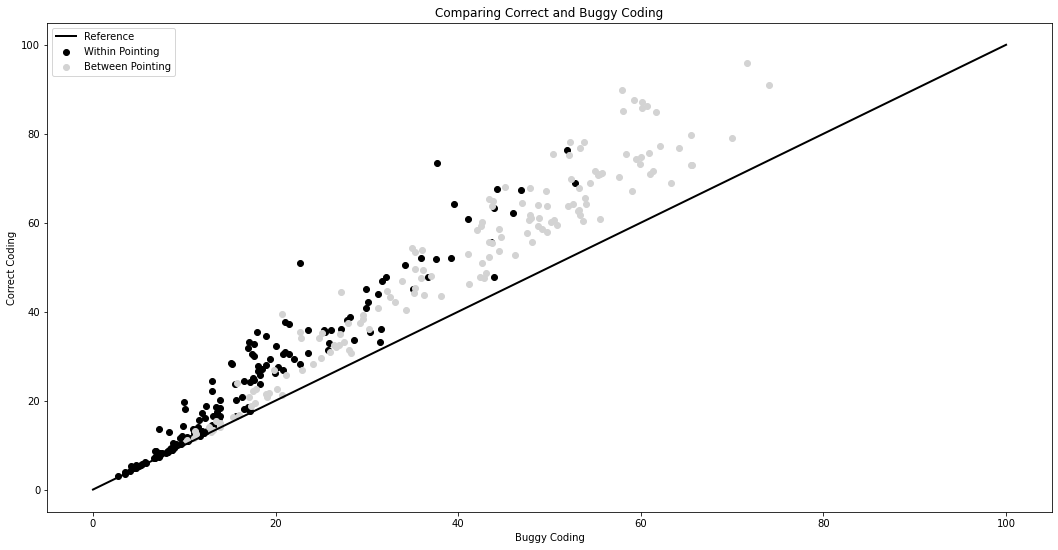

In [22]:
#%% FIGURE: Deviation from perfect coding by averaged pointing judgments
fig, ax = plt.subplots(figsize=(18,9))

ax = plt.scatter(avgNew['bad_pointing_coding_within'],
                 avgNew['good_pointing_coding_within'],
                 c='black',label='Within Pointing')

ax = plt.scatter(avgNew['bad_pointing_coding_between'],
                 avgNew['good_pointing_coding_between'],
                 c='lightgrey',label='Between Pointing')

# Plot the reference line where good/bad coding would be equal.
refLine = np.linspace(0, 100, 1000)
ax = plt.plot(refLine,refLine,c='black',linewidth=2,label='Reference');

plt.xlabel("Buggy Coding")
plt.ylabel("Correct Coding")
plt.legend()
plt.title('Comparing Correct and Buggy Coding')
plt.show()

### Comparing Buggy and Correct for between and within statistically

A few quick stats show that although the difference between buggy and correct exists, and that participant performance is correlated with the amount of change, the correlations (Pearson and Spearman) are extraordinarily high. 

In [23]:
# Determine the partial correlation of bad between pointing with distance partialling out within.
# Using this to see if I need to look separately for between/within pointing routes for this. 
# The answer appears to be yes. 
pg.partial_corr(data=avgNew, 
                x='bad_pointing_coding_between', 
                y='distance', 
                covar='bad_pointing_coding_within').round(3)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,147,0.517,"[0.39, 0.63]",0.267,0.257,0.0,4.743e+08,1.0


In [24]:
avgOriginal = participantData[participantData['New_or_Original']=='Original']
avgOriginal = avgOriginal[avgOriginal['SBSOD'].notna()]

for i in ['bad_pointing_coding_between','bad_pointing_coding_within']:
    [t,p] = stats.ttest_ind(avgNew[i],avgOriginal[i])
    avgNewMean = avgNew[i].mean()
    avgOriginalMean = avgOriginal[i].mean()
    print(f'{i}: New Avg = {avgNewMean:.2f} | Orig Avg = {avgOriginalMean:.2f} | T-val = {t:.2f},p < {p:.5f}\n')
 

withinR,p = stats.pearsonr(avgNew['bad_pointing_coding_within'],
                 avgNew['good_pointing_coding_within'])

betweenR,p = stats.pearsonr(avgNew['bad_pointing_coding_between'],
                 avgNew['good_pointing_coding_between'])

withinRanks,p = stats.spearmanr(avgNew['bad_pointing_coding_within'],
                 avgNew['good_pointing_coding_within'])

betweenRanks,p = stats.spearmanr(avgNew['bad_pointing_coding_between'],
                 avgNew['good_pointing_coding_between'])


bugCorrectBetween,p = stats.pearsonr(avgNew['bad_pointing_coding_between'],
                 avgNew['distance'])

bugCorrectWithin,p = stats.pearsonr(avgNew['bad_pointing_coding_within'],
                 avgNew['distance'])


print(f"The amount of change for between and within pointing average correlates with participant performance\n" + 
      f"Worse pointers were more affected by the bug.\n" + 
     f"Within: R = {bugCorrectWithin:.3f}\n" + 
      f"Between: R = {bugCorrectBetween:.3f}\n") 



print(f"Correlations between Buggy and Correct coding at the participant level were very high.\n" + 
     f"Within: Pearson's R = {withinR:.2f}; Spearman's R = {withinRanks:.2f}\n" + 
     f"Between: Pearson's R = {betweenR:.2f}; Spearman's R = {betweenRanks:.2f}\n")

bad_pointing_coding_between: New Avg = 40.46 | Orig Avg = 45.32 | T-val = -3.19,p < 0.00153

bad_pointing_coding_within: New Avg = 17.95 | Orig Avg = 23.31 | T-val = -4.43,p < 0.00001

The amount of change for between and within pointing average correlates with participant performance
Worse pointers were more affected by the bug.
Within: R = 0.688
Between: R = 0.688

Correlations between Buggy and Correct coding at the participant level were very high.
Within: Pearson's R = 0.97; Spearman's R = 0.98
Between: Pearson's R = 0.97; Spearman's R = 0.96



## Changes in other findings

These graphs and statistics show pretty clearly that: 

1) There was a bug that affected participant-level data. 

2) The effects of the bug are worse for participants who did worse on the pointing task. 

Did the changes in the pointing task affect any other measures? 

### SBSOD

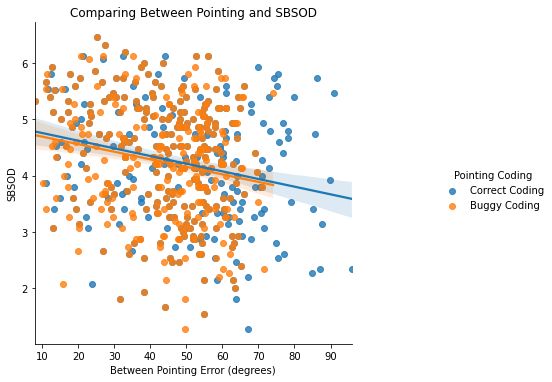

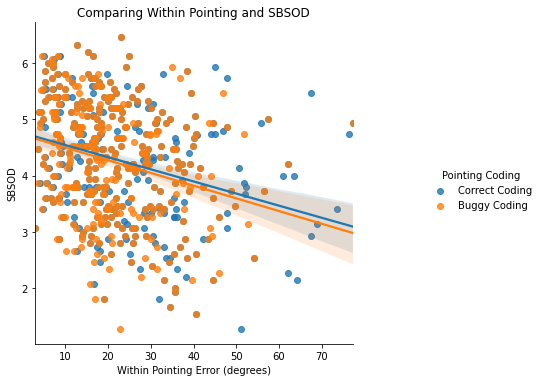

In [25]:
#%% FIGURES: SBSOD

# Create the longform version of the data.
participantData_Long_Diff = pd.melt(participantData, 
                                id_vars=['participant','SBSOD','MRT'],
                                value_vars=['good_pointing_coding_between',
                                            'bad_pointing_coding_between'])

participantData_Long_Same = pd.melt(participantData, 
                                id_vars=['participant','SBSOD','MRT'],
                                value_vars=['good_pointing_coding_within',
                                            'bad_pointing_coding_within'])

# Create labels to use for these plots
title = 'Pointing Coding'
new_labels = ['Correct Coding', 'Buggy Coding']


# SBSOD Between
sbsodBetween = sns.lmplot(x="value", y="SBSOD",hue='variable',data=participantData_Long_Diff,legend_out=True)

sbsodBetween._legend.set_title(title)
for t, l in zip(sbsodBetween._legend.texts, new_labels): t.set_text(l)
sbsodBetween = sbsodBetween.set_axis_labels("Between Pointing Error (degrees)","SBSOD")
plt.title('Comparing Between Pointing and SBSOD')
plt.show()

#SBSOD Within
sbsodWithin = sns.lmplot(x="value", y="SBSOD",hue='variable',data=participantData_Long_Same)

sbsodWithin._legend.set_title(title)
for t, l in zip(sbsodWithin._legend.texts, new_labels): t.set_text(l)
sbsodWithin = sbsodWithin.set_axis_labels("Within Pointing Error (degrees)","SBSOD")
plt.title('Comparing Within Pointing and SBSOD')
plt.show()


### MRT

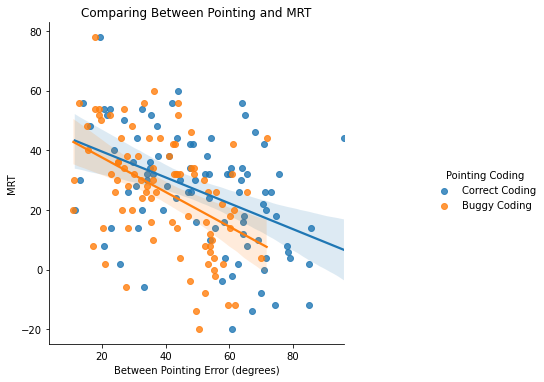

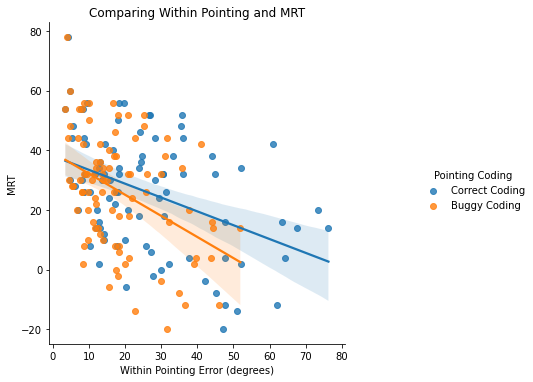

In [26]:

# MRT Between 
mrtBetween = sns.lmplot(x="value", y="MRT",hue='variable',data=participantData_Long_Diff)


mrtBetween._legend.set_title(title)
for t, l in zip(mrtBetween._legend.texts, new_labels): t.set_text(l)
mrtBetween = mrtBetween.set_axis_labels("Between Pointing Error (degrees)","MRT")
plt.title('Comparing Between Pointing and MRT')
plt.show()

# MRT Within
mrtWithin = sns.lmplot(x="value", y="MRT",hue='variable',data=participantData_Long_Same)


mrtWithin._legend.set_title(title)
for t, l in zip(mrtWithin._legend.texts, new_labels): t.set_text(l)
mrtWithin = mrtWithin.set_axis_labels("Within Pointing Error (degrees)","MRT")
plt.title('Comparing Within Pointing and MRT')
plt.show()


# Trial level data

This section is more exploratory. We want to see whether there are specific effects of certain trials. In the explainer of the bug above, this would be something we should expect. 

First, a bit of a data carpentry. 

In [27]:
# Just some data carpentry here

# Map the mean onto the longform dataset. Do this separately for between/within. 
pointingData_within = pointingData.copy()
pointingData_between = pointingData.copy()
pointingData_within = pointingData_within[pointingData_within['same or different route'] == 'same']
pointingData_between = pointingData_between[pointingData_between['same or different route'] == 'different']

# For within...
pointingData_per_participant_within = pointingData_within.groupby('participant').bad_pointing.mean()
mean_dict_within = pointingData_per_participant_within.to_dict()
pointingData_within['partic_and_between_within_mean'] = pointingData_within['participant'].map(mean_dict_within)

# For between...
pointingData_per_participant_between = pointingData_between.groupby('participant').bad_pointing.mean()
mean_dict_between = pointingData_per_participant_between.to_dict()
pointingData_between['partic_and_between_within_mean'] = pointingData_between['participant'].map(mean_dict_between)

# Now concat them. 
pointingData = pd.concat([pointingData_between,pointingData_within])

# Now add some additional variables to allow us to compare a few cases: 
# Original data
# New data where there was a difference between buggy and correct coding. 
# New data where there was NO difference between buggy and correct coding. 
pointingData['pointing_code_error'] = np.where(np.isclose(pointingData["bad_pointing"],
                                         pointingData["good_pointing"]), 'no error', 'error')

pointingData['bad_good_orig_new'] = pointingData['pointing_code_error'] + "_" + pointingData['Original_or_New']

pointingData['bad_good_orig_new'] = np.where(pointingData['bad_good_orig_new']==
                                             'diff_Original', 
                                             'Original', 
                                             pointingData['bad_good_orig_new'])



## Carpet plot: Distribution of error by whether there was a bug or not

Fair warning, this plot is very busy. 

Start by looking at JUST the green dots. These are the original data, showing the distribution of the errors. All of the errors here are buggy coding (remember, we can't recreate the original data to know which trials are buggy and which ones are not). 

Now we can look at the orange and blue dots in each row. 

C:\Users\smwei\Anaconda3\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\smwei\Anaconda3\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\smwei\Anaconda3\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\smwei\Anaconda3\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\smwei\Anaconda3\lib\sit

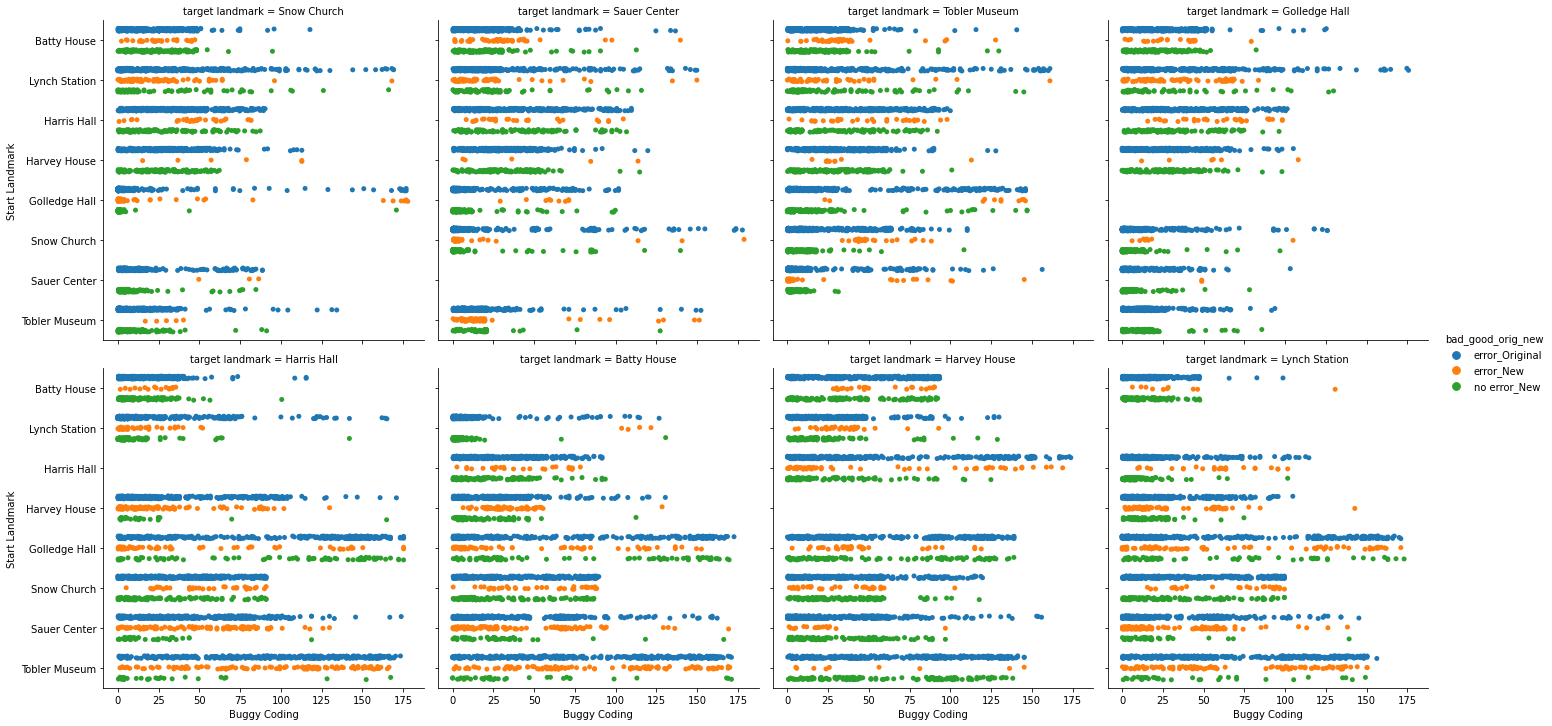

In [28]:
# Now we're ready! 
# Maybe a plot here of each pointing trial where each dot is colored by that subject's mean. 

g = sns.catplot(x="bad_pointing", y="start landmark",
                col="target landmark", hue='bad_good_orig_new',
                col_wrap=4,data=pointingData, kind = "strip",
                jitter=True,dodge=True,legend=True,legend_out=True)

g.set_axis_labels("Buggy Coding", "Start Landmark")

plt.show(g)

What can we learn from that plot? 

Well, one thing is that each trial (each row of blue/orange/green dots) has a different distribution of errors. Compare, for example, Starting at Batty and Pointing at Harris (lower left panel, top row) with Starting at Golledge, Pointing at Harris (lower left panel, 5th row down, labeled as "Golledge Hall"). 

The distributions of all dots are different between these two trials. Participants were almost guessing for Golledge -> Harris! But quite good for Batty -> Harris!

Another thing we can see if we look carefully is that the orange and green dots have DIFFERENT distributions. This is another way of saying that committing an error was NOT random. Instead, it depended on the particular trial. This also suggests that committing a pointing judgment resulting in a buggy coding affected different distributions of judgments. 

The next plot has a way of looking that a little differently. 

## Distributions of pointing angles by trial

<div class="alert alert-block alert-info">
<b>Note:</b> We are now looking at where the participant pointed relative to the reference angle. NOT the error between those two.</div> 


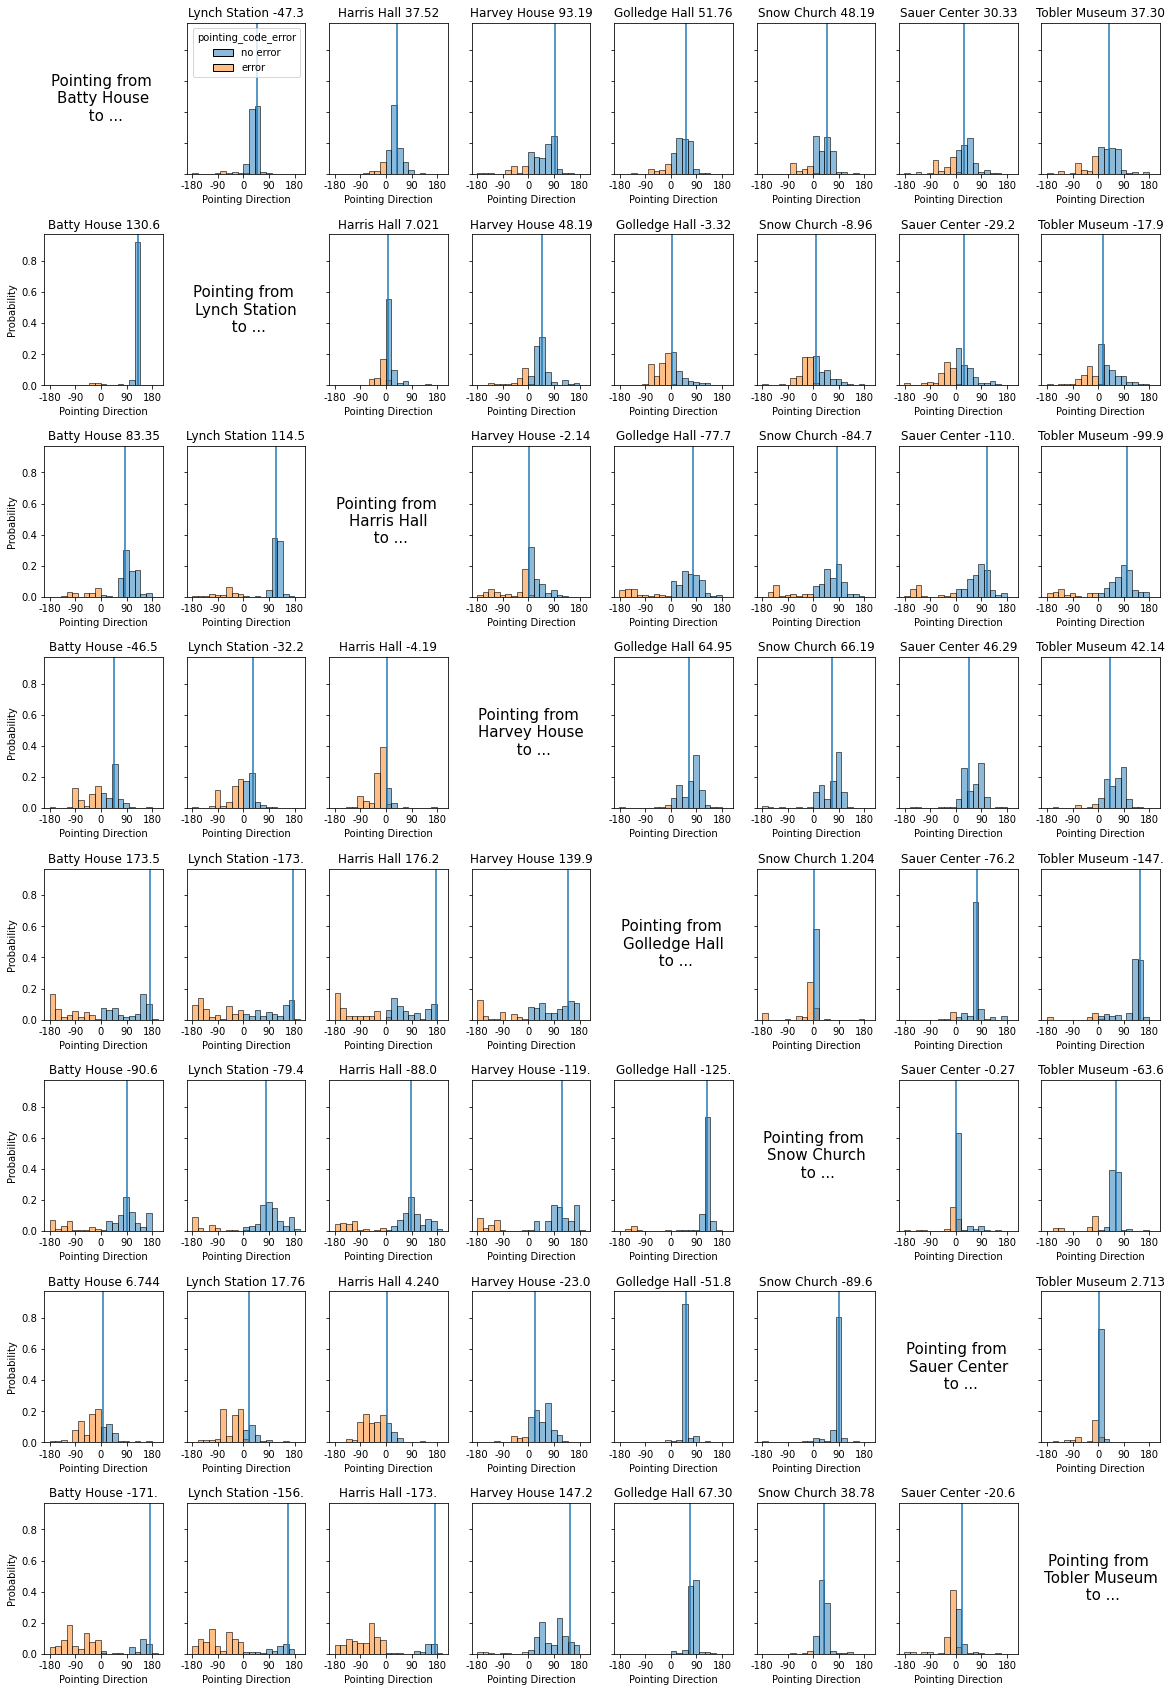

In [29]:
buildings = ['Batty House','Lynch Station','Harris Hall','Harvey House','Golledge Hall','Snow Church','Sauer Center','Tobler Museum']


fig, axes = plt.subplots(8,8, sharey=True, figsize=(20,30))

plt.subplots_adjust(hspace=.4)

for fromNum,pointFrom in enumerate(buildings):
    
    for toNum,pointTo in enumerate(buildings):
        
        oneVal = pointingData[pointingData['start landmark'] == pointFrom]
        oneVal = oneVal[oneVal['target landmark'] == pointTo]
        oneVal = oneVal[oneVal['Original_or_New'] == 'New']
        
        try:
            val = oneVal.groupby('start landmark')['actual direction'].mean()[0]
            plotVal = val
            if val < 0:
                plotVal = -val
                oneVal['bearing'] = -oneVal['bearing']
            

            if fromNum == 0 and toNum == 1:
                legend = True
            else:
                legend = False
            
            g = sns.histplot(ax=axes[fromNum,toNum],data=oneVal, x="bearing"
                             ,hue='pointing_code_error',
                             hue_order=['no error','error'],
                             binwidth=20,binrange=[-181,181],stat='probability',
                             legend = legend)
            
            
            axes[fromNum,toNum].set_xticks([-180,-90,0,90,180])
            axes[fromNum,toNum].set_xticklabels(['-180','-90','0','90','180'])
            axes[fromNum,toNum].set_xlabel('Pointing Direction')
            axes[fromNum,toNum].axvline(x=plotVal)
            g.set_title(pointTo + ' ' + str(val)[:5])
        
        except:
            axes[fromNum,toNum].axis('off')
            axes[fromNum,toNum].text(0.5, 0.5, 'Pointing from \n' + pointFrom + '\n to ...',
                           verticalalignment='center',horizontalalignment='center',
                           transform=axes[fromNum,toNum].transAxes,fontsize=15)
            pass
             
        

## Interpreting that plot

As a reminder, here is how the bug works: 

The blue line down the center is the angle of the actual judgment. For example, standing at Batty Hall, pointing to Harris Hall, the participant would need to point 37.52&deg;. That angle means that standing at Batty, facing down the route toward Lynch Station, Harris Hall's front door will be 37.52&deg; clockwise. 

However, any judgments that were counter-clockwise from that facing direction would have had a bug. In other words, a perfectly correct judgment (37.52&deg;) would have been recorded exactly the same as a pointing judgment that was 37.52&deg; COUNTER-CLOCKWISE. 

All of the ACTUAL pointing angles have been been made positive (compare the actual angle written for say Batty House to Lynch Station, which is -47) for ease of viewing. The reference angle is always 0 here (even though that changes for each row compared to actual North in Silcton). 

Note that any judgments that were counter-clockwise from the reference angle (negative) were buggy! That means, in the original data, these judgments would have been flipped over onto the positive side of the x-axis. 

We can note another curious thing we discussed earlier. Some judgments were unaffected (Pointing from Tobler Museum to Golledge Hall). Every single participant judgment was clockwise (and pretty accurate). On the other hand, judgments that were near zero had a LOT of buggy judgments (Pointing From Sauer Center to Batty House). But these judgments would have resulted in almost no change to the data. That's because the actual angle is so close to the reference angle that changing an error calculation of: 

`|-35 - 6| = 41` is pretty close to `|35 - 6| = 29` - although not identical. 

Other trials are more problematic. Look at Pointing From Harris Hall to Batty House. Even though there are a fairly small number of erroneous judgments, these result in huge changes. If a participant responded -90&deg;, this would have been coded as correct, even though it is off by almost 180&deg;. 

# Ensuring the coordinates were correct

Various changes to the Silcton environment over the years, and the discovery of this error, meant I wanted to find and re-create the coordinates used in the original calculation of the model building task AND the actual angular directions. 

To do so, I discovered a .yml / .json layout in the [seeds.rb](https://bitbucket.org/ab320012/silcton/src/master/db/seeds.rb) file on the website. 

One thing that appeared true about these coordinates (front_door_pixel_x and front_door_pixel_y is they were flipped 180 degrees about the z-axis. That is, the Y-coordinates were reversed. I have verified that this does not affect the model-building task AND did not affect the pointing task any further (since everything was in absolute values anyway). 

But, to ensure these coordinates were still correct, I created a set of cube objects in the Unity scene currently being used to generate the virtual environments. These cubes needed to be scaled (1.2), rotated (180 in X and Y directions), and translated; then lined up with the front door locations of the buildings. 

This made me confident that the original coordinates were still correct; although to determine whether the actual angle should be stored as *positive* (clockwise from the facing direction to 180) or *negative* (counterclockwise from the facing direction to 180). 

# Fixing the bug

The first step was to fix two aspects of how the data were coded and stored. First, replacing the original unsigned calculation with a signed calculation. 

<img src="../images/Fixed_Unity_Pointing_Angle_Calculation.png">

The only changes to this line are to store the SignedAngle (which returns a negative angle when the participants turns LEFT with respect to the direction from the first vector, and returns a positive angle when the participant turns RIGHT with respect to the first vector). 

A quick word about the inputs to that function: 

The first two inputs are vectors. The first, is the vector between the pointers' current position and the NEXT diamond along the route, except for the last building on each main route, for which the facing diamond is the PREVIOUS diamond. (So, from Batty house, the facing diamond is Lynch Station; but from Harvey House, the facing diamond is Harris Hall). One additional tweak to the code was required, which is the y-values needed to be the same for the current position and the facing diamond position. 

The last input is the vector around which the rotation should be calculated (in this case, the vector pointing straight up). 

Now, Unity is returning the signed angles (positive or negative) with respect to a particular direction (facing the next or previous diamond). 